## Diabetes Prediction: Studying Various Models

This Notebooks conducts a very basic implementation of different classification models to train a diabetes predection model.

The data is from Kaggle. You can access the dataset from [here](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

I am new to the party, so don't hesitate to suggest any improvements on this piece of work.

Thank you <3

In [139]:
import pandas as pd

data = pd.read_csv("diabetes.csv")
data.sample(5, random_state=42)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [140]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As it's fairly obvious, the dataset contains a considerable number of instances with Insulin value of zero. Since this parameter plays a great rule in diabetes detection, replacing the missing values (which nearly half of instance do) with something like average or median, does not seem right.

As you can see below, 49 percent of instances are missing Insulin values.

In addition, nearly 30 percent of the instances do have a Skin Thickness value equal to zero, which is not possible.

In [141]:
zero_insulin = round(data[data['Insulin'] == 0]['Insulin'].count() / len(data) * 100, 1)
zero_skin_thickness = round(data[data['SkinThickness'] == 0]['SkinThickness'].count() / len(data) * 100, 1)
print(f'Instances with Insulin level of zero: {zero_insulin} %')
print(f'Instances with Skin Thickness of zero: {zero_skin_thickness} %')

Instances with Insulin level of zero: 48.7 %
Instances with Skin Thickness of zero: 29.6 %


With the code below, it is evident that all the instances which have no associated Skin Thickness value also miss an Insulin value.

In [142]:
zero_both = round(data[(data['Insulin'] == 0) & (data['SkinThickness'] == 0)]['Insulin'].count() / len(data) * 100, 1)
print(f'Instances with both Insulin and Skin Thickness of zero: {zero_both} %')

Instances with both Insulin and Skin Thickness of zero: 29.6 %


My desicion here was to remove all the instances with missing Insulin values. It might be wrong and I am not sure if that's the best way to address that issue.

In [143]:
fixed_data = data[data['Insulin'] != 0]
print(f'Data shrinked from {len(data)} instances to {len(fixed_data)}.')

Data shrinked from 768 instances to 394.


Also, there are some zero values for BMI and Glucose level that are practically impossible. So we replace those with the median value with respect to the non-zero values in the same column.

In [145]:
median_glucose = fixed_data[fixed_data['Glucose'] != 0]['Glucose'].median()
median_bmi = fixed_data[fixed_data['BMI'] != 0]['BMI'].median()

fixed_data.loc[fixed_data['Glucose'] == 0, "Glucose"] = median_glucose
fixed_data.loc[fixed_data['BMI'] == 0, "BMI"] = median_bmi

fixed_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.606599,70.654822,29.106599,155.548223,33.072843,0.525543,30.814721,0.329949
std,3.209635,30.783576,12.469919,10.504273,118.775855,7.015007,0.350127,10.198971,0.470792
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.400000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


After the data is cleaned and prepared, it's time to split the data into training and test sets. An evaluation set is not included because the dataset is already very small, so 2 sets is enough.

In [146]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(fixed_data, test_size=0.2, random_state=42)

train = train_set.drop(columns=['Outcome'])
train_label = train_set['Outcome']

test = test_set.drop(columns=['Outcome'])
test_label = test_set['Outcome']

The first model is a Logistic Regression model with a Ridge Regularization term (penalty=l2). A feature scaling is applied to the data to obtain better results.

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

logistic_reg = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, penalty="l2")
)
logistic_reg.fit(train, train_label)
logistic_reg_pred = logistic_reg.predict(test)

logistic_reg_accuracy = round((logistic_reg_pred == test_label).mean() * 100, 2)
print(f'Accuracy of Logistic Regression model: {logistic_reg_accuracy} %')

Accuracy of Logistic Regression model: 78.48 %


Secondly, 2 different Support Vector Machine Models are trained, one with a Polynomial kernel and the other one with a RBF kernel. As you can see, the RBF kernel performs better in this case.

In [148]:
from sklearn.svm import SVC

svc_poly = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", random_state=42)
)

svc_rbf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", random_state=42)
)
svc_poly.fit(train, train_label)
svc_rbf.fit(train, train_label)

svc_poly_pred = svc_poly.predict(test)
svc_rbf_pred = svc_rbf.predict(test)

svc_poly_accuracy = round((svc_poly_pred == test_label).mean() * 100, 2)
svc_rbf_accuracy = round((svc_rbf_pred == test_label).mean() * 100, 2)

print(f'Accuracy of SVC model with Poly kernel: {svc_poly_accuracy} %')
print(f'Accuracy of SVC model with RBF kernel: {svc_rbf_accuracy} %')

Accuracy of SVC model with Poly kernel: 75.95 %
Accuracy of SVC model with RBF kernel: 77.22 %


Third, we train a decision tree. The accuracy is awful for the model with default hyperparameters, but we will improve it a little bit later.

In [149]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42,)
tree_clf.fit(train, train_label)
tree_clf_pred = tree_clf.predict(test)
tree_clf_accuracy = round((tree_clf_pred == test_label).mean() * 100, 2)
print(f'Accuracy of Decision Tree model: {tree_clf_accuracy} %')

Accuracy of Decision Tree model: 72.15 %


The First Ensemble model in this notebook is this Random Forest Classifier with default hyperparameter values, which has a performance close to SVC with RBF kernel.

In [150]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(train, train_label)
rnd_clf_pred = rnd_clf.predict(test)
rnd_clf_accuracy = round((rnd_clf_pred == test_label).mean() * 100, 2)
print(f'Accuracy of Random Forest` model: {rnd_clf_accuracy} %')

Accuracy of Random Forest` model: 77.22 %


Now it's time to conduct a grid search with some typical values. To keep the computation time low enough, only a couple of hyperparameters are studied in this grid search, but the improvement is acceptable!

In [151]:
from sklearn.model_selection import GridSearchCV

param_grid_tree = [
    {'max_depth': [2, 3, 4, 5, 6]}
]
param_grid_forest = [
    {'max_depth': [2, 3, 4, 5],
     'n_estimators': [100, 200, 300, 500]}
]

grid_srch_tree = GridSearchCV(tree_clf, param_grid_tree, cv=3, n_jobs=-1)
grid_srch_forest = GridSearchCV(rnd_clf, param_grid_forest, cv=3, n_jobs=-1)

grid_srch_tree.fit(train, train_label)
print('Desicion Tree Grid Search Done!')
grid_srch_forest.fit(train, train_label)
print('Random Forest Grid Search Done!')

print('- - - - - - - - - - - - - - - - - ')

print(f'Desicion Tree Best Parameters: {grid_srch_tree.best_params_}')
print(f'Random Forest Best Parameters: {grid_srch_forest.best_params_}')

best_tree_clf = grid_srch_tree.best_estimator_
best_tree_clf_pred = best_tree_clf.predict(test)
best_tree_clf_accuracy = round((best_tree_clf_pred == test_label).mean() * 100, 2)

best_forest_clf = grid_srch_forest.best_estimator_
best_forest_clf_pred = best_forest_clf.predict(test)
best_forest_clf_accuracy = round((best_forest_clf_pred == test_label).mean() * 100, 2)

print(f'Accuracy of Best Decision Tree model: {best_tree_clf_accuracy} %')
print(f'Accuracy of Best Random Forest model: {best_forest_clf_accuracy} %')

Desicion Tree Grid Search Done!
Random Forest Grid Search Done!
- - - - - - - - - - - - - - - - - 
Desicion Tree Best Parameters: {'max_depth': 3}
Random Forest Best Parameters: {'max_depth': 3, 'n_estimators': 200}
Accuracy of Best Decision Tree model: 81.01 %
Accuracy of Best Random Forest model: 79.75 %


The last model is to use Logistic Regression, SVC, and Decision Tree models to vote for the result! A Voting Classification model is trained here which has a very good performance.

In [152]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ("logreg", logistic_reg),
        ("svc", svc_rbf),
        ("tree", best_tree_clf)
    ],
    voting='hard'
)
voting_clf.fit(train, train_label)
voting_clf_pred = voting_clf.predict(test)
voting_clf_accuracy = round((voting_clf_pred == test_label).mean() * 100, 2)
print(f'Accuracy of Voting Ensemble model: {voting_clf_accuracy} %')

Accuracy of Voting Ensemble model: 81.01 %


Here are some of the instances that the best model in this study (the Voting Classification) wrongly predicted.

In [153]:
test_set['VotingPrediction'] = voting_clf_pred
wrong_predictions = test_set[test_set['Outcome'] != test_set['VotingPrediction']]
wrong_predictions.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,VotingPrediction
328,2,102,86,36,120,45.5,0.127,23,1,0
258,1,193,50,16,375,25.9,0.655,24,0,1
755,1,128,88,39,110,36.5,1.057,37,1,0
669,9,154,78,30,100,30.9,0.164,45,0,1
187,1,128,98,41,58,32.0,1.321,33,1,0


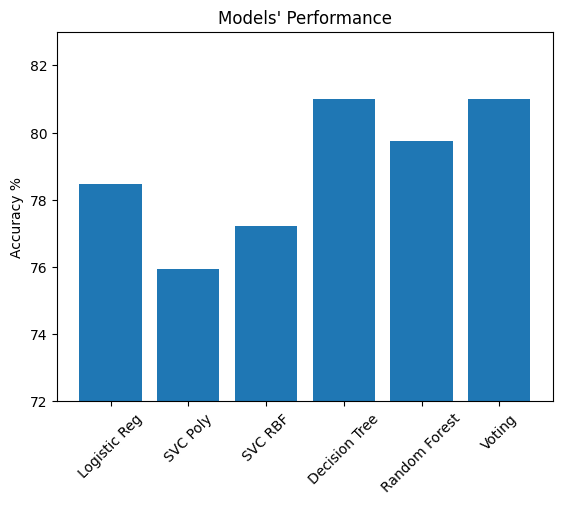

In [155]:
import matplotlib.pyplot as plt

models_accuracies = [logistic_reg_accuracy, svc_poly_accuracy, svc_rbf_accuracy, best_tree_clf_accuracy, best_forest_clf_accuracy, voting_clf_accuracy]
models_names = ["Logistic Reg", "SVC Poly", "SVC RBF", "Decision Tree", "Random Forest", "Voting"]

fig, ax = plt.subplots()
plt.bar(models_names, models_accuracies)
ax.set_ylim(72, 83)
ax.set_ylabel("Accuracy %")
ax.set_title("Models' Performance")
plt.xticks(rotation=45);

Thank you for your attention!

And ones again, please suggest any improvements that comes to your mind.